In [1]:
import xarray as xr
import numpy as np

from xcube.core.geocoded import reproject_dataset, compute_output_geom, GeoCoding
from xcube.core.sentinel3 import open_sentinel3_product
from xcube.util.perf import measure_time

Setup local, CPU-based dask cluster:

In [2]:
#from dask.distributed import Client
#client = None

In [3]:
#if client is not None:
#    client.close()

In [4]:
#client = Client()

In [5]:
path = 'C:\\Users\\Norman\\Downloads\\S3B_OL_1_EFR____20190728T103451_20190728T103751_20190729T141105_0179_028_108_1800_LN1_O_NT_002.SEN3'

Define a fake-logger. The normal logger output does not appear in notebooks.

In [6]:
class Logger:
    info = print
logger = Logger()

---
Open a Sentinel-3 OLCI L1b product:

In [7]:
src_ds = open_sentinel3_product(path)
src_ds

<xarray.Dataset>
Dimensions:         (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    longitude       (rows, columns) float64 dask.array<chunksize=(819, 973), meta=np.ndarray>
    latitude        (rows, columns) float64 dask.array<chunksize=(819, 973), meta=np.ndarray>
    Oa02_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa17_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa01_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa08_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa04_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa13_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa07_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa16_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa18_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa09_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa10_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa06_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa05_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa11_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa12_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    quality_flags   (rows, columns) uint32 dask.array<chunksize=(819, 973), meta=np.ndarray>
    Oa19_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa03_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa20_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    detector_index  (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa14_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa21_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa15_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>

In [8]:
src_ds.Oa13_radiance

<xarray.DataArray 'Oa13_radiance' (rows: 4091, columns: 4865)>
dask.array<open_dataset-c4d815ef4b14de725398eeb37abd9b39Oa13_radiance, shape=(4091, 4865), dtype=float32, chunksize=(1023, 1217), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

In [9]:
src_ds.Oa13_radiance.encoding

{'zlib': True,
 'shuffle': True,
 'complevel': 2,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1023, 1217),
 'source': 'C:\\Users\\Norman\\Downloads\\S3B_OL_1_EFR____20190728T103451_20190728T103751_20190729T141105_0179_028_108_1800_LN1_O_NT_002.SEN3\\Oa13_radiance.nc',
 'original_shape': (4091, 4865),
 'dtype': dtype('uint16'),
 '_FillValue': 65535,
 'scale_factor': 0.007861301,
 'add_offset': 0.0}

---
Compute (pixel-based) geo-coding:

In [10]:
gc = GeoCoding.from_dataset(src_ds)

In [11]:
gc.xy_names

('longitude', 'latitude')

In [12]:
gc.x

<xarray.DataArray 'longitude' (rows: 4091, columns: 4865)>
dask.array<open_dataset-b1a868a58239ad926b26060953d58478longitude, shape=(4091, 4865), dtype=float64, chunksize=(819, 973), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      DEM corrected longitude
    standard_name:  longitude
    units:          degrees_east
    valid_max:      180000000
    valid_min:      -180000000

In [13]:
gc.y

<xarray.DataArray 'latitude' (rows: 4091, columns: 4865)>
dask.array<open_dataset-b1a868a58239ad926b26060953d58478latitude, shape=(4091, 4865), dtype=float64, chunksize=(819, 973), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      DEM corrected latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    valid_min:      -90000000

In [14]:
gc.is_lon_normalized

False

Speedup by loading x,y arrays

In [15]:
gc.x.load()
gc.y.load()

<xarray.DataArray 'latitude' (rows: 4091, columns: 4865)>
array([[73.353817, 73.353724, 73.353631, ..., 69.392316, 69.390915,
        69.389513],
       [73.351265, 73.351172, 73.351079, ..., 69.390159, 69.388758,
        69.387356],
       [73.348713, 73.34862 , 73.348527, ..., 69.388002, 69.3866  ,
        69.385199],
       ...,
       [62.921048, 62.920886, 62.920725, ..., 59.966632, 59.96562 ,
        59.964609],
       [62.918494, 62.918333, 62.918172, ..., 59.964223, 59.963211,
        59.9622  ],
       [62.91594 , 62.915779, 62.915618, ..., 59.961814, 59.960802,
        59.959791]])
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      DEM corrected latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    valid_min:      -90000000

---
Compute image geometry for output:

In [16]:
with measure_time(tag='compute_output_geom', logger=logger):
    og = compute_output_geom(src_ds, geo_coding=gc)

compute_output_geom: took 2338.06ms


In [17]:
og.size, og.tile_size

((20259, 7386), (20259, 7386))

In [18]:
og.xy_bbox

(-11.918857, 59.959790999999996, 24.819910881039963, 73.3539634453014)

In [19]:
og = og.derive(tile_size=(2048, 1024))
og.size, og.tile_size

((20259, 7386), (2048, 1024))

In [20]:
with measure_time(tag='xy_bboxes', logger=logger):
    xy_bboxes = og.xy_bboxes

xy_bboxes: took 0.20ms


In [21]:
xy_bboxes

array([[-11.918857  ,  59.959791  ,  -8.20671633,  61.81495461],
       [ -8.20490287,  59.959791  ,  -4.4927622 ,  61.81495461],
       [ -4.49094875,  59.959791  ,  -0.77880808,  61.81495461],
       [ -0.77699462,  59.959791  ,   2.93514605,  61.81495461],
       [  2.9369595 ,  59.959791  ,   6.64910017,  61.81495461],
       [  6.65091363,  59.959791  ,  10.3630543 ,  61.81495461],
       [ 10.36486775,  59.959791  ,  14.07700842,  61.81495461],
       [ 14.07882188,  59.959791  ,  17.79096255,  61.81495461],
       [ 17.792776  ,  59.959791  ,  21.50491667,  61.81495461],
       [ 21.50673013,  59.959791  ,  24.81809743,  61.81495461],
       [-11.918857  ,  61.81676806,  -8.20671633,  63.67193167],
       [ -8.20490287,  61.81676806,  -4.4927622 ,  63.67193167],
       [ -4.49094875,  61.81676806,  -0.77880808,  63.67193167],
       [ -0.77699462,  61.81676806,   2.93514605,  63.67193167],
       [  2.9369595 ,  61.81676806,   6.64910017,  63.67193167],
       [  6.65091363,  61

In [22]:
with measure_time(tag='ij_bboxes', logger=logger):
    ij_bboxes = gc.ij_bboxes(xy_bboxes)

ij_bboxes: took 2924.02ms


In [23]:
ij_bboxes

array([[  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [2664, 4033, 2896, 4090],
       [2879, 3823, 3668, 4090],
       [3563, 3578, 4480, 4090],
       [4241, 3316, 4864, 4090],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3740,  706, 4090],
       [ 663, 3647, 1419, 4090],
       [1336, 3520, 2144, 4090],
       [1999, 3355, 2877, 4090],
       [2659, 3160, 3562, 4031],
       [3302, 2933, 4239, 3820],
       [3936, 2674, 4864, 3576],
       [4559, 2529, 4864, 3238],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3025,  660, 3793],
       [ 576, 2942, 1334, 3738],
       [1204, 2827, 1998, 3645],
       [1824, 2678, 2657, 3518],
       [2441, 2495, 3300, 3353],
       [3048, 2284, 3935, 3158],
       [3637, 2044, 4557, 2931],
       [4220, 1774, 4864, 2671],
       [4784, 1730, 4864, 1906],
       [  -1,   -1,   -1,   -1],
       [  

Do the same, but this time using a *generalized ufunc*:

In [25]:
with measure_time(tag='ij_bboxes (gu=True)', logger=logger):
    ij_bboxes = gc.ij_bboxes(xy_bboxes, gu=True)

ij_bboxes (gu=True): took 2674.76ms


---
Now that `og` has a defined tile size, the reprojected dataset will be composed of lazy dask arrays and producing the dataset is quite cheap. Most of the time is spend in computing source bboxes for all tile's xy bboxes:

In [26]:
with measure_time(tag='reproject_dataset', logger=logger):
    dst_ds = reproject_dataset(src_ds, var_names='Oa13_radiance', geo_coding=gc, output_geom=og)

computing src_ij_bboxes took 2.332265399999983 seconds
<xarray.DataArray (dim_0: 80, dim_1: 4)>
array([[  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [2661, 4031, 2897, 4090],
       [2878, 3821, 3669, 4090],
       [3562, 3577, 4481, 4090],
       [4240, 3314, 4864, 4090],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3739,  707, 4090],
       [ 662, 3646, 1420, 4090],
       [1334, 3518, 2145, 4090],
       [1998, 3353, 2879, 4090],
       [2658, 3159, 3563, 4032],
       [3300, 2932, 4241, 3822],
       [3935, 2672, 4864, 3578],
       [4558, 2528, 4864, 3240],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3023,  663, 3794],
       [ 575, 2940, 1335, 3740],
       [1203, 2825, 1999, 3647],
       [1823, 2676, 2659, 3519],
       [2439, 2493, 3301, 3355],
       [3047, 2283, 3936, 3160],
       [3636, 2042, 4559, 2933],
       [4219,

In [27]:
dst_ds

<xarray.Dataset>
Dimensions:        (latitude: 7386, longitude: 20259)
Coordinates:
  * longitude      (longitude) float64 -11.92 -11.92 -11.92 ... 24.82 24.82
  * latitude       (latitude) float64 59.96 59.96 59.96 ... 73.35 73.35 73.35
Data variables:
    Oa13_radiance  (latitude, longitude) float32 dask.array<chunksize=(1024, 2048), meta=np.ndarray>

In [28]:
Oa13_radiance = dst_ds.Oa13_radiance
Oa13_radiance

<xarray.DataArray 'Oa13_radiance' (latitude: 7386, longitude: 20259)>
dask.array<Oa13_radiance, shape=(7386, 20259), dtype=float32, chunksize=(1024, 2048), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 -11.92 -11.92 -11.92 ... 24.81 24.82 24.82
  * latitude   (latitude) float64 59.96 59.96 59.96 59.97 ... 73.35 73.35 73.35
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

In [29]:
Oa13_radiance.chunks

((1024, 1024, 1024, 1024, 1024, 1024, 1024, 218),
 (2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 1827))

In [30]:
Oa13_radiance.data

dask.array<Oa13_radiance, shape=(7386, 20259), dtype=float32, chunksize=(1024, 2048), chunktype=numpy.ndarray>

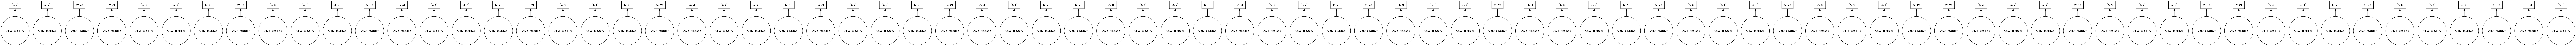

In [31]:
Oa13_radiance.data.visualize()

Let's load the reprojected band into memory and see how long it takes:

In [33]:
with measure_time(tag='Oa13_radiance.load', logger=logger):
    Oa13_radiance = Oa13_radiance.load()

Oa13_radiance.load: took 0.11ms


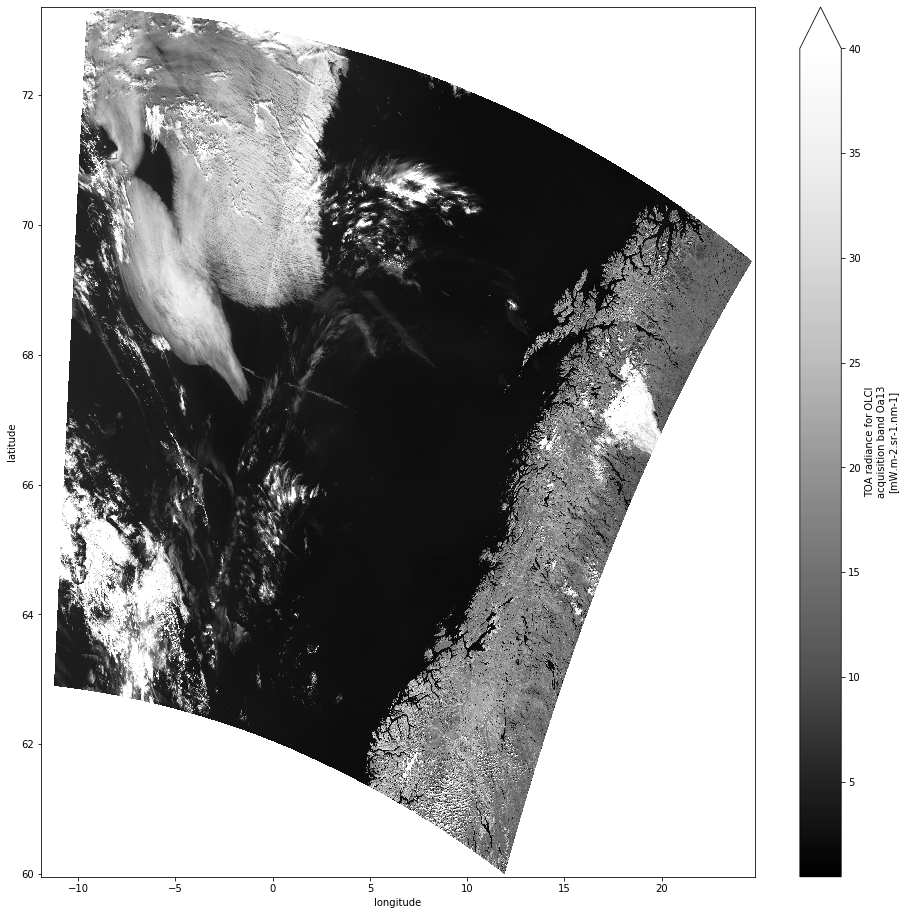

In [36]:
Oa13_radiance.plot.imshow(figsize=(16,16), vmax=40, cmap='Greys_r')

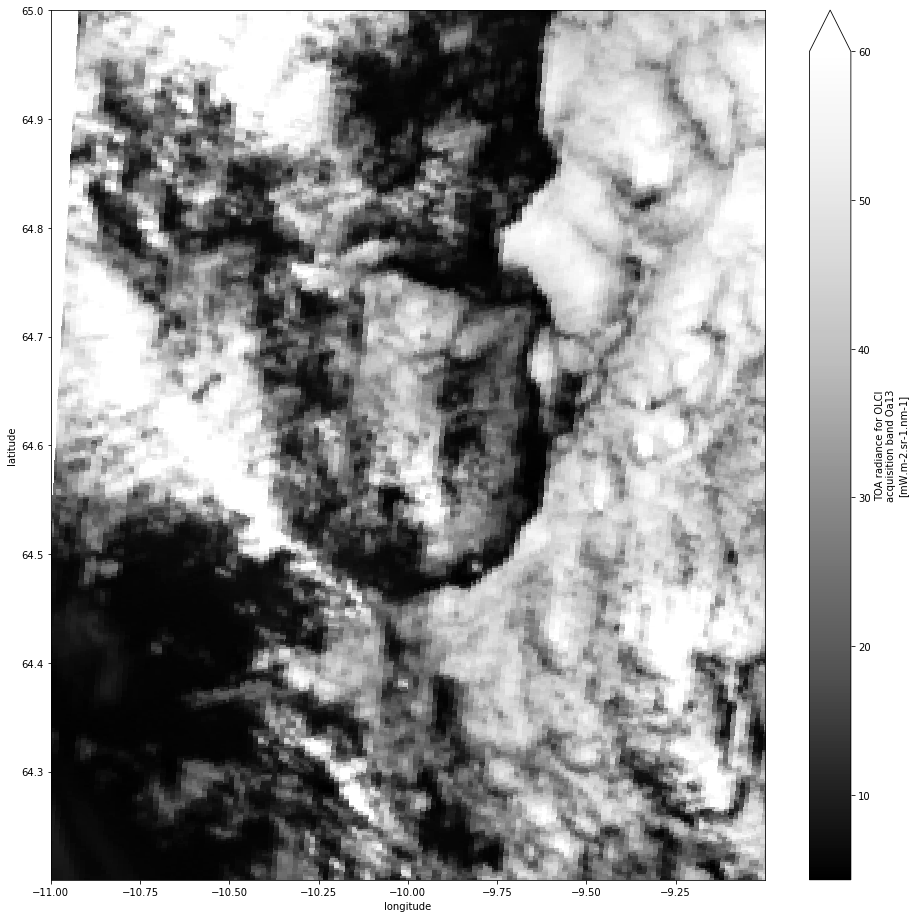

In [35]:
Oa13_radiance.sel(longitude=slice(-11, -9), latitude=slice(64.2,65)).plot.imshow(figsize=(16,16), vmax=60, cmap='Greys_r')